In [1]:
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json

with open('krx_total_list.txt','r') as f:
    tickers = json.loads(f.read())
len(tickers)

2085

In [3]:
# check 
cnt = 0
for i,v in tickers.items():
    if '마켓' in v:
        ticker = i+'.'+v['마켓']
        cnt+=1
cnt

2085

In [63]:
def check_data(n1, n2):
    cnt = 0;log=[]
    print('check from {} to {}, processing'.format(n1,n2),end='')
    for i,v in tickers.items():
        cnt+=1
        if cnt > n1 and '마켓' in v:
            ticker = i+'.'+v['마켓']
            try:
                history = pd.read_pickle('./data5y/{}-test'.format(ticker))
                print(cnt,ticker,len(history),v['회사명'])
            except Exception as e:
                print(cnt,ticker,'failed',e,v['회사명'])
                pass
        if cnt == n2 :
            break
    print('check finished.')

In [ ]:
check_data(0,500)

In [25]:
'''2 306200.KS 224 세아제강
3 293480.KS 224 하나제약
4 010400.KS 224 우진아이엔에스
5 293940.KS 224 신한알파리츠
6 300720.KS 224 한일시멘트
7 091810.KS 224 티웨이항공
8 286940.KS 224 롯데정보통신
9 298040.KS 224 효성중공업
10 298050.KS 224 효성첨단소재'''

'2 306200.KS 224 세아제강\n3 293480.KS 224 하나제약\n4 010400.KS 224 우진아이엔에스\n5 293940.KS 224 신한알파리츠\n6 300720.KS 224 한일시멘트\n7 091810.KS 224 티웨이항공\n8 286940.KS 224 롯데정보통신\n9 298040.KS 224 효성중공업\n10 298050.KS 224 효성첨단소재'

# Data extraction for chart.js

In [6]:
test = pd.read_pickle('./data5y/008500.KS-test')
test.shape

(1453, 6)

### pd -> CSV file

In [53]:
test.to_csv('test-csv.csv', header=False)

### pd -> csv , select column

In [123]:
# header = ['Close']
test.to_csv('test-csv-close.csv', header=False, columns = ['Close'])

### pd -> dict

In [27]:
test_dict = test.to_dict('index')

In [52]:
for i in test_dict.keys():
    print(i, type(i))
    break

2013-01-02 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### from dict

In [56]:
with open('test_to_dict','r') as f:
    test2 = json.loads(f.read())
len(test2)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

### json

In [16]:
test.to_json("test-json.json")

In [17]:
import json
with open('test-json.json','r') as f:
    test_json = json.loads(f.read())

In [19]:
type(test_json)

dict

In [77]:
test.keys

<bound method NDFrame.keys of                High      Low     Open    Close  Volume     Adj Close
Date                                                                
2013-01-02  14800.0  14500.0  14700.0  14650.0  2650.0  11738.838867
2013-01-03  14800.0  14550.0  14650.0  14800.0   424.0  11859.032227
2013-01-04  14750.0  14250.0  14600.0  14750.0  3350.0  11818.967773
2013-01-07  14700.0  14450.0  14700.0  14600.0   490.0  11698.775391
2013-01-08  14650.0  14450.0  14450.0  14600.0   330.0  11698.775391
2013-01-09  14600.0  14400.0  14450.0  14500.0  1608.0  11618.645508
2013-01-10  14550.0  14400.0  14450.0  14500.0  1510.0  11618.645508
2013-01-11  14550.0  14400.0  14550.0  14500.0  1112.0  11618.645508
2013-01-14  14550.0  14400.0  14500.0  14450.0  1830.0  11578.582031
2013-01-15  14550.0  14400.0  14400.0  14450.0   550.0  11578.582031
2013-01-16  14550.0  14400.0  14400.0  14450.0   540.0  11578.582031
2013-01-17  14450.0  14400.0  14400.0  14450.0    50.0  11578.582031
2013

In [62]:
test.columns.tolist()

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [66]:
test.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22',
               '2018-11-23', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='Date', length=1453, freq=None)

In [113]:
test.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22',
               '2018-11-23', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='Date', length=1453, freq=None)

In [118]:
str(testindex[0]).split()[0]

'2013-01-02'

In [12]:
testlist = test.values.tolist()

In [14]:
testlist[1]

[14800.0, 14550.0, 14650.0, 14800.0, 424.0, 11859.0322265625]

# Graph test

1. graph check 
2. save image
3. iteration


In [52]:
test = pd.read_pickle('./data5y/306200.KS-test')
test.shape

(39, 6)

(77, 6)


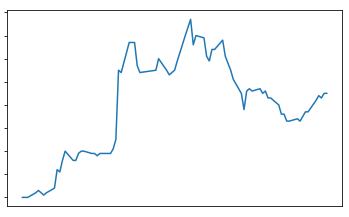

In [53]:
test = pd.read_pickle('./data5y/293940.KS-test')
print(test.shape)
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot();

(50, 6)


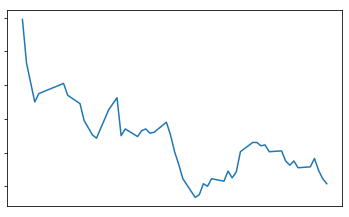

In [40]:
test = pd.read_pickle('./data5y/010400.KS-test')
print(test.shape)
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot();

(42, 6)


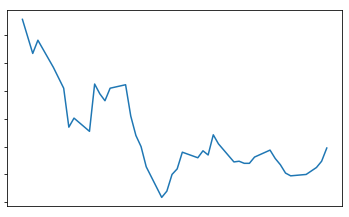

In [58]:
test = pd.read_pickle('./data5y/293480.KS-test')
print(test.shape)
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot();

(39, 6)


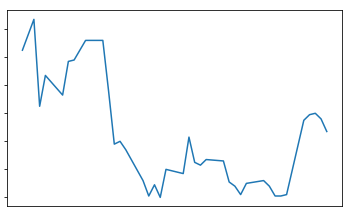

In [57]:
test = pd.read_pickle('./data5y/306200.KS-test')
print(test.shape)
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot();

In [9]:
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot();
plt.close(fig)

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot(figsize=(2,1));

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


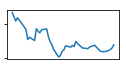

In [60]:
#sample 
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot(figsize=(2,1))
fig.savefig('./graph5y/006920.KQ.2.png')

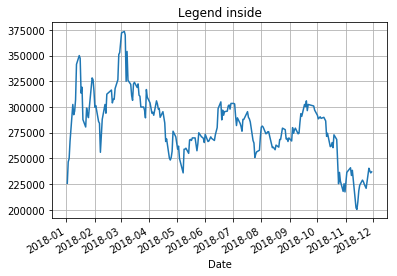

In [74]:
fig = plt.figure()
# ax = plt.subplot(111)
test['Close'].plot(grid=True);
plt.title('Legend inside')
ax.legend()

In [47]:
fig.savefig('006920.KQ.1.png')

# iteration

In [61]:
def make_graph(n1, n2):
    cnt = 0;log=[]
    print('request data from {} to {}, processing..'.format(n1,n2),end='')
    for i,v in tickers.items():
        cnt+=1
        if cnt > n1 and '마켓' in v:
            ticker = i+'.'+v['마켓']
            try:
                df = pd.read_pickle('./data5y/{}-test'.format(ticker))
                fig = plt.figure()
                ax = plt.axes()
                ax.xaxis.set_visible(False)
                ax.set_yticklabels([])
                df['Close'].plot(figsize=(2,1))
                fig.savefig('./graph5y/{}.png'.format(ticker))
                plt.close(fig)
                log.append((cnt,ticker,'plotted.',v['회사명']))
                print('.',end='')
            except Exception as e:
                log.append((cnt,ticker,'failed.',e,v['회사명']))
                print(cnt,ticker,'failed',e,v['회사명'])
                pass
        if cnt == n2 :
            break
    print(' plotting finished.')
    filename = 'log-plot-{}-{}.txt'.format(n1,n2)
    with open('./graph/'+filename, 'w') as f:
        for i in log:
            f.write("{}\n".format(i))
        print(filename,'file saved!')

In [62]:
make_graph(0,500)

request data from 0 to 500, processing.......................................38 145720.KS failed [Errno 2] No such file or directory: './data5y/145720.KS-test' 덴티움
.....................................................................................................................................................................204 099340.KS failed [Errno 2] No such file or directory: './data5y/099340.KS-test' 하나니켈1호
205 099350.KS failed [Errno 2] No such file or directory: './data5y/099350.KS-test' 하나니켈2호
..............220 096300.KS failed [Errno 2] No such file or directory: './data5y/096300.KS-test' 베트남개발1
........................................................................................................................................................................................................................................................................................ plotting finished.
log-plot-0-500.txt file saved!


In [38]:
#5 year data - prediction
make_graph(0,1200)

request data from 0 to 1200, processing...............................................................................................................110 152550.KS failed [Errno 2] No such file or directory: './data/152550.KS-test' 한국ANKOR유전
.............................................................................................204 099340.KS failed [Errno 2] No such file or directory: './data/099340.KS-test' 하나니켈1호
205 099350.KS failed [Errno 2] No such file or directory: './data/099350.KS-test' 하나니켈2호
..............220 096300.KS failed [Errno 2] No such file or directory: './data/096300.KS-test' 베트남개발1
................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
# 10 year graph 

def make_graph(n1, n2):
    cnt = 0;log=[]
    print('request data from {} to {}, processing..'.format(n1,n2),end='')
    for i,v in tickers.items():
        cnt+=1
        if cnt > n1 and '마켓' in v:
            ticker = i+'.'+v['마켓']
            try:
                df = pd.read_pickle('./data10y/{}'.format(ticker))
                fig = plt.figure()
                ax = plt.axes()
                ax.xaxis.set_visible(False)
                ax.set_yticklabels([])
                df['Close'].plot(figsize=(2,1))
                fig.savefig('./graph10y/{}.png'.format(ticker))
                plt.close(fig)
                log.append((cnt,ticker,'plotted.',v['회사명']))
                print('.',end='')
            except Exception as e:
                log.append((cnt,ticker,'failed.',e,v['회사명']))
                print(cnt,ticker,'failed',e,v['회사명'])
                pass
        if cnt == n2 :
            break
    print(' plotting finished.')
    filename = 'log-plot-{}-{}.txt'.format(n1,n2)
    with open('./graph10y/'+filename, 'w') as f:
        for i in log:
            f.write("{}\n".format(i))
        print(filename,'file saved!')
make_graph(0,1000)

request data from 0 to 1000, processing...................................34 267270.KS failed [Errno 2] No such file or directory: './data10y/267270.KS' 현대건설기계
.........................................................................................................................................................................204 099340.KS failed [Errno 2] No such file or directory: './data10y/099340.KS' 하나니켈1호
205 099350.KS failed [Errno 2] No such file or directory: './data10y/099350.KS' 하나니켈2호
..............220 096300.KS failed [Errno 2] No such file or directory: './data10y/096300.KS' 베트남개발1
............................................................................................................................................................................................................................................................................................................................................................................................................